In [1]:
!pip install nvidia-ml-py

  Using cached nvidia_ml_py-11.525.84-py3-none-any.whl (34 kB)


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip3 install transformers
!pip3 install torch torchvision
!pip install transformers 
!pip upgrade sklearn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
ERROR: unknown command "upgrade"



In [3]:
!pip install nvidia-smi

  Using cached nvidia_smi-0.1.3-py36-none-any.whl (11 kB)
  Using cached sorcery-0.2.2-py3-none-any.whl (16 kB)
  Using cached littleutils-0.2.2.tar.gz (6.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=a26125104d592be98319f6f0fefec98a9498a66573f77b72dfd4f7f20bad59b0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import io
import os
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
import matplotlib as plt
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from distutils.version import LooseVersion as LV
#from packaging import version as LV
from sklearn.metrics import *
import numpy as np
import pandas as pd
from sklearn.metrics import matthews_corrcoef

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'sklearn'

In [5]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    devicename = '['+torch.cuda.get_device_name(0)+']'
else:
    device = torch.device('cpu')
    devicename = ""
    
print('Using PyTorch version:', torch.__version__,
      'Device:', device, devicename)
assert(LV(torch.__version__) >= LV("1.0.0"))

Using PyTorch version: 1.13.1+cpu Device: cpu 


In [7]:
df = pd.read_csv("./BERTdataset.csv")

In [8]:
df.head()

,Toxicity,tweet,tweet_clean,tweet_tokenized,tweet_tok=2,tweet_lemmatized,preprocessed_text
0,0,@user when a father is dysfunctional and is so...,father dysfunctional selfish drags kids dysfun...,"['father', 'dysfunctional', 'selfish', 'drags'...","[('father', 'dysfunctional'), ('dysfunctional'...","['father', 'dysfunctional', 'selfish', 'drag',...",father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit can not use cause do not ...,"['thanks', 'lyft', 'credit', 'can', 'not', 'us...","[('thanks', 'lyft'), ('lyft', 'credit'), ('cre...","['thank', 'lyft', 'credit', 'can', 'not', 'use...",thank lyft credit can not use cause do not off...
2,0,bihday your majesty,bihday majesty,"['bihday', 'majesty']","[('bihday', 'majesty')]","['bihday', 'majesty']",bihday majesty
3,0,factsguide: society now #motivation,factsguide society motivation,"['factsguide', 'society', 'motivation']","[('factsguide', 'society'), ('society', 'motiv...","['factsguide', 'society', 'motivation']",factsguide society motivation
4,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...,"['huge', 'fan', 'fare', 'big', 'talking', 'lea...","[('huge', 'fan'), ('fan', 'fare'), ('fare', 'b...","['huge', 'fan', 'fare', 'big', 'talk', 'leave'...",huge fan fare big talk leave chaos pay dispute...


In [9]:
df['tweet_clean']=df['tweet_clean'].fillna("")

In [10]:
# Encoding target variable
encoder = LabelEncoder()
X = df['tweet_clean']
#y = df['Toxicity']
y = encoder.fit_transform(df["Toxicity"]) 
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

In [11]:
print(y)

[0 0 0 ... 1 1 0]


In [12]:
# Transform target in tensors
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)

TEXT PROCESSING PER BERT
(1) Tokenize the sentence.
(2) Map tokens to their IDs.
(3) Prepend the `[CLS]` token to the start. Append the `[SEP]` token to the end.
(4) Pad or truncate the sentence to `max_length`
(5) Create attention masks for [PAD] tokens.
Function tokenizer.encode_plus was used which encapsulates the whole procedure

In [13]:
# (1)
# Load the BERT tokenizer.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [14]:
# Example for a tweet 
print("Tokenized tweet: ", tokenizer.tokenize(X_train.values[0]))
print("Original tweet: ", X_train.values[0])

Tokenized tweet:  ['hell', 'wrong', 'humanity', 'would', 'anyone', 'need', 'anything', 'prove']
Original tweet:  hell wrong humanity would anyone need anything prove


In [15]:
# (2)
# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(X_train.values[0])))

Token IDs:  [3109, 3308, 8438, 2052, 3087, 2342, 2505, 6011]


In [16]:
# (3)
# Example complete:
#To be properly handled by BERT we need to add the [CLS] token at the beginning of text. Il token [SEP] è un altro token speciale richiesto da BERT alla fine della frase.
sentence = X_train.values[0]
tokens_ = tokenizer.tokenize(sentence)
tokens_ = ['[CLS]'] + tokens_ + ['[SEP]']
print("Tokenized tweet: ", tokens_)
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokens_))

Tokenized tweet:  ['[CLS]', 'hell', 'wrong', 'humanity', 'would', 'anyone', 'need', 'anything', 'prove', '[SEP]']
Token IDs:  [101, 3109, 3308, 8438, 2052, 3087, 2342, 2505, 6011, 102]


RICERCA MAX LENGTH TRAIN & TEST

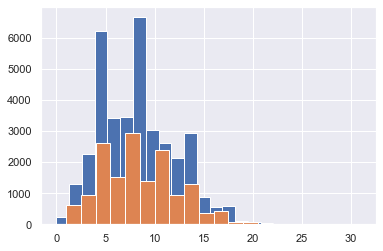

In [17]:
#(4)
#Ora impostiamo le lunghezze massime della sequenza per le nostre frasi di addestramento e test come MAX_LEN_TRAIN e MAX_LEN_TEST. 
#La lunghezza massima supportata dal modello BERT utilizzato è 128 e 512.
#Ma noi ricerchiamo la massima adatta al task --> prendo le frasi e le divido per trovare di quante parole sono composte --> è la lunghezza della frase 
#se lo facciamo per ogni frase poi vediamo quale è la più lunga e prendiamo come valore massimo quello

train = [len(i.split()) for i in X_train]
test = [len(i.split()) for i in X_test]

for i in [train, test]:
  pd.Series(i).hist(bins=20)

In [18]:
MAX_LENGTH = 25

Successivamente usiamo il tokenizer BERT per convertire ogni token in un indice intero nel vocabolario BERT. Riempiamo anche le sequenze più brevi con gli indici "MAX_LEN_TRAIN" o "MAX_LEN_TEST" (le due LEN sono entrambe pari a MAX_LENGTH) con zeri finali.
BERT richiede anche *maschere di attenzione*, con 1 per ogni token reale nelle sequenze e 0 per il riempimento.

In [19]:
def prepare_data(data, max_len):
  inputs_ = []
  attention_mask = []
  for tweet in data:
    encoded_dict = tokenizer.encode_plus(
      tweet, #tweet to encode = (tokenize + add special character)
      add_special_tokens = True, # Add [CLS] for specify classification task and [SEP]
      max_length = max_len,
      pad_to_max_length  = True, #For pad & truncate all sentence
      return_attention_mask = True, # For return attention masks
      #return_tensors = 'pt' # Return pythorch tensors
    )
    # Select encoded sentence    
    inputs_.append(encoded_dict['input_ids'])

    # Select attention masks
    attention_mask.append(encoded_dict['attention_mask'])

  # Convert the lists into tensors.
  input_ids = torch.tensor(inputs_)
  attention_masks = torch.tensor(attention_mask)

  return input_ids, attention_masks

In [20]:
train_data, train_masks = prepare_data(X_train, MAX_LENGTH)
test_data, test_masks = prepare_data(X_test, MAX_LENGTH)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\User\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2342: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [21]:
#Prova: Print sentence 0, now as a list of IDs.
print('Original: ', X_train.values[0])
print('Token IDs:', train_data[0])
print('Attention Mask:', train_masks[0])

Original:  hell wrong humanity would anyone need anything prove
Token IDs: tensor([ 101, 3109, 3308, 8438, 2052, 3087, 2342, 2505, 6011,  102,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0])
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0])


In [22]:
#We use scikit-learn's train_test_split() to use 10% of our training data as a validation set.
(train_inputs, validation_inputs,
 train_labels, validation_labels) = train_test_split(train_data, train_labels,
                                                     random_state=42,
                                                     test_size=0.1)
(train_masks, validation_masks,
 _, _) = train_test_split(train_masks, train_data,
                          random_state=42, test_size=0.1)

We create PyTorch *DataLoader*s for all data sets.
For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32.

In [23]:
BATCH_SIZE = 32

In [24]:
def dataloader(input_ids, attention_masks, labels, name):
  dataset = TensorDataset(input_ids, attention_masks, labels) #Combine inputs in to a TensorDataset
  if name == "Train":
    sampler = RandomSampler(dataset)  # Select batches randomly
  else:
    sampler = SequentialSampler(dataset)  # Select batches sequentially
  data_loader = DataLoader(
            dataset,
            sampler = sampler,
            batch_size = BATCH_SIZE # Number of batchsize
  )
  print(f"{name} documents {len(dataset)}")
  return data_loader

In [25]:
train_dataloader = dataloader(train_inputs, train_masks, train_labels, "Train")
test_dataloader = dataloader(test_data, test_masks, test_labels, "Test")
val_dataloader = dataloader(validation_inputs, validation_masks, validation_labels, "Validation")

Train documents 32870
Test documents 15653
Validation documents 3653


In [27]:
# Function to calculate the accuracy of our predictions vs labels
def accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
"bert-base-uncased" = the 12-layer BERT model, with an uncased vocab.se the 12-layer BERT model, with an uncased vocabulary

In [28]:
#bert model initialization
BERTMODEL = "bert-base-uncased"

In [29]:
model = BertForSequenceClassification.from_pretrained(
    BERTMODEL, 
    num_labels = 2, # Binary classification   
    output_attentions = False, 
    output_hidden_states = False
)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

C:\Users\User\anaconda3\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.

In [30]:
#To run this model on the GPU
model.cuda()

AssertionError: Torch not compiled with CUDA enabled

In [31]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

We set the remaining hyperparameters needed for fine-tuning the pretrained model: 
 * EPOCHS: the number of training epochs in fine-tuning
   (recommended values between 2 and 4) 
 * WEIGHT_DECAY: weight decay for the Adam optimizer 
 * LR: learning rate for the Adam optimizer (2e-5 to 5e-5 recommended) 
 * WARMUP_STEPS: number of warmup steps to (linearly) reach the set learning rate

We also need to grab the training parameters from the pretrained model.

In [31]:
#define optimizer Adam
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, 
                  eps = 1e-8
                )

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [32]:
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [33]:
# Tell PyTorch to use the GPU.    
device = torch.device("cuda")

In [34]:
training_stats = []
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data
    for step, batch in enumerate(train_dataloader):
        b_input_ids = batch[0].to(device) #batch[0] - input_ids
        b_input_mask = batch[1].to(device) #batch[1] - attention_masks
        b_labels = batch[2].to(device) #batch[2] - labels

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs".
        model.zero_grad() 

        # Forward pass (for evaluate the model on this training batch)
        model1 = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels) 
        loss = model1.loss
        logits = model1.logits
        
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()       


        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)    

    print("\n \t Average training loss: {0:.2f}".format(avg_train_loss))
    
    
    # ========================================
    #               Validation PHASE 
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in val_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        
            model2 = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = model2.loss
            logits = model2.logits
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(val_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(val_dataloader)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy
        }
    )


======== Epoch 1 / 2 ========
Training...

 	 Average training loss: 0.20
  Accuracy: 0.95
  Validation Loss: 0.16

======== Epoch 2 / 2 ========
Training...

 	 Average training loss: 0.12
  Accuracy: 0.95
  Validation Loss: 0.15


In [35]:
# Display floats with two decimal places.
pd.set_option('precision', 6)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.
epoch,,,
1,0.196404,0.156126,0.946196
2,0.123415,0.153809,0.945380


Evaluation on test

In [36]:
# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  prediction = np.argmax(logits, axis=1)

  # Store predictions and true labels
  for i in prediction:
    predictions.append(i)
  for i in label_ids:
    true_labels.append(i)

In [37]:
def model_evaluation(real_v, pred_v):
    print(f"Accuracy sore: {accuracy_score(real_v, pred_v)}")
    print("Classification report:")
    print(classification_report(real_v, pred_v))
    cm = confusion_matrix(real_v, pred_v)
    print (f"Confusion matrix \n {cm}")

In [38]:
model_evaluation(true_labels, predictions)

Accuracy sore: 0.9424391490449116
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8734
           1       0.93      0.94      0.93      6919

    accuracy                           0.94     15653
   macro avg       0.94      0.94      0.94     15653
weighted avg       0.94      0.94      0.94     15653

Confusion matrix 
 [[8278  456]
 [ 445 6474]]
